In [1]:
include("../src/celerite.jl")
using celerite
using Plots
using Distributions

ErrorException: importing celerite into Main conflicts with an existing identifier

[1.0 -1.0; -1.0 1.0]

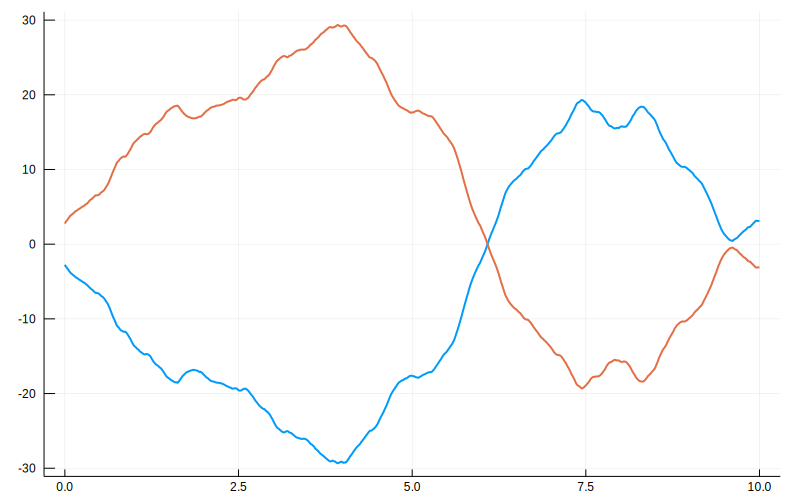

In [121]:
# parameters for kernel function
log_s = log(0.1)
log_q = log(1/sqrt(2))
log_w0 = 2
log_c = log_w0 - log(2) - log_q
c = exp(log_c)
Q = ones(2, 2)
Q[1, 1] = 1
Q[1, 2] = -1
Q[2, 2] = 1
Q[2, 1] = -1
print(Q)
n = 2

# independent variable 
t = collect(0.0:0.01:10)

# define the gp
t1 = celerite.SHOTerm(log_s, log_q, log_w0)
t2 = celerite.SHOTerm(log(100), log(1/sqrt(2)), 0.1)

u = randn(n*length(t))
gp = celerite.Celerite(t1+t2, Q)

# compute the gp
logD = celerite.compute!(gp, t, 0.01)
# sample the gp
y = celerite.simulate_gp(gp, u)

# plot the samples
using Plots
plot(size=(800, 500), legend=false)
for i in 1:n
    plot!(t, y[i,:], linewidth=2, linealpha=1)
end
#plot(t, y)
current()